## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load Data

In [2]:
file_path = 'cleaned.csv'
data = pd.read_csv(file_path)
data

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720
...,...,...,...,...,...,...,...,...,...,...,...,...
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480


## Set Visualization

In [3]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(12,6)

## Data Overview and summary

In [8]:
data_summary = data.describe()
data_summary

,item_id,user_id,rating,timestamp,year,month,quantity,unitprice,amount
count,45166.000000,4.516600e+04,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000,45166.000000
mean,3455.669574,4.846225e+05,4.218594,42077.370743,2014.710136,6.387902,7.490878,7491.027587,56118.889032
std,2485.219357,3.302487e+05,1.221118,816.969504,2.264562,3.598405,1.707673,1441.977833,16924.053525
min,1.000000,2.800000e+01,1.000000,36692.000000,2000.000000,1.000000,5.000000,5000.000000,25000.000000
25%,1518.000000,1.969772e+05,4.000000,41802.000000,2014.000000,3.000000,6.000000,6239.000000,43098.250000
50%,2881.000000,4.410355e+05,5.000000,42219.000000,2015.000000,6.000000,7.000000,7480.000000,54243.000000
75%,5178.000000,7.579805e+05,5.000000,42594.000000,2016.000000,10.000000,9.000000,8735.000000,67760.000000
max,9551.000000,1.157632e+06,5.000000,43374.000000,2018.000000,12.000000,10.000000,10000.000000,100000.000000


In [7]:
missing_values = data.isnull().sum()
missing_values

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

## EDA ( Exploratory Data Analysis)

In [10]:
category_counts = data['category'].value_counts()
brand_counts = data['brand'].value_counts()

In [14]:
print('*'*50)
print('Top 5 Categories: \n',category_counts.head())
print('-'*50)
print('Top 5 Brands: \n',brand_counts.head())
print('-'*50)

**************************************************
Top 5 Categories: 
 category
Headphones                 16211
Computers & Accessories    10108
Camera                      9153
Portable Audio & Video      3351
Accessories & Supplies      2414
Name: count, dtype: int64
--------------------------------------------------
Top 5 Brands: 
 brand
Logitech    4344
Bose        4336
Sony        2979
EldHus      2469
Mpow        2259
Name: count, dtype: int64
--------------------------------------------------


## Yearly and Monthly Purchase Trends

In [15]:
yearly_trend = data.groupby('year')['amount'].sum()

## Monthly purchase trends

In [16]:
monthly_trend = data.groupby('month')['amount'].sum()

In [17]:
# Displaying
print('*'*50)
print('Yearly Purchase Trend:  \n',yearly_trend)
print('-'*50)
print('Monthly Purchase Trend: \n',monthly_trend)
print('-'*50)

**************************************************
Yearly Purchase Trend:  
 year
2000       131350
2001       774526
2002      1093002
2003      2703200
2004      4342946
2005      7129136
2006      7682219
2007     19014820
2008     25183191
2009     31782539
2010     46010449
2011     60980073
2012     86746346
2013    203808953
2014    401383841
2015    635759487
2016    558113646
2017    322405079
2018    119620939
Name: amount, dtype: int64
--------------------------------------------------
Monthly Purchase Trend: 
 month
1     277178087
2     224456559
3     211794176
4     187613515
5     193123303
6     192012754
7     203163773
8     218550984
9     189864160
10    186447984
11    195141103
12    255319344
Name: amount, dtype: int64
--------------------------------------------------


## Correlation between amount, quantity, and unit price

In [18]:
correlation_matrix = data[['amount','quantity','unitprice']].corr()
print('Correlation Matrix:\n',correlation_matrix)

Correlation Matrix:
              amount  quantity  unitprice
amount     1.000000  0.756842   0.638742
quantity   0.756842  1.000000   0.001833
unitprice  0.638742  0.001833   1.000000


## Split data by genders

In [19]:
male_ratings = data[data['gender'] == 'Male']['rating']
female_ratings = data[data['gender'] == 'female']['rating']
# Perform a t-test to see if there is a significant difference between 
# male and female ratings
t_stat, p_value = stats.ttest_ind(male_ratings, female_ratings)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

T-test result: t-statistic = nan, p-value = nan


## Mean and Standard Deviation Using Numpy

In [21]:
# Calculate mean and standard deviation for quantity, unitprice and amount
mean_quantity = np.mean(data['quantity'])
std_quantity = np.std(data['quantity'])

mean_unitprice = np.mean(data['unitprice'])
std_unitprice= np.std(data['unitprice'])

mean_amount = np.mean(data['amount'])
std_amount = np.std(data['amount'])


In [22]:
# Displaying
print(f'Mean Quantity: {mean_quantity},Std Dev:{std_quantity}')
print(f'Mean Unitprice: {mean_unitprice},Std Dev:{std_unitprice}')
print(f'Mean Amount: {mean_amount},Std Dev:{std_amount}')

Mean Quantity: 7.490878094141611,Std Dev:1.707653830574075
Mean Unitprice: 7491.027587123057,Std Dev:1441.9618696458376
Mean Amount: 56118.88903157242,Std Dev:16923.86617055038


## Visualization

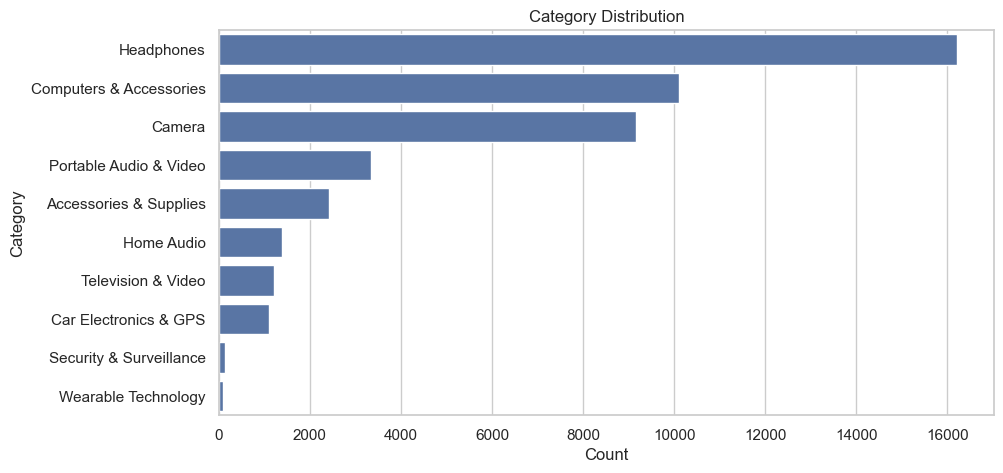

In [26]:
# Category Distribution
plt.figure(figsize=(10,5))
sns.countplot(data=data,y='category',order=category_counts.index)
plt.title('Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

## Yearly Purchase Trends Visualization

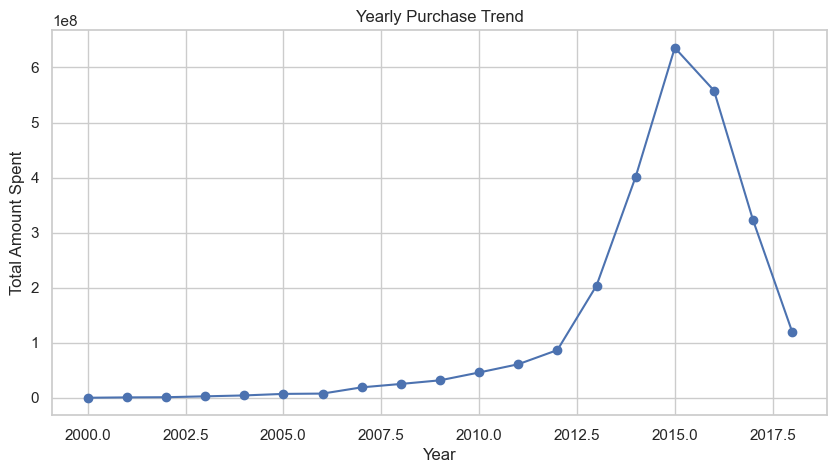

In [27]:
plt.figure(figsize=(10,5))
yearly_trend.plot(kind='line',marker='o')
plt.title('Yearly Purchase Trend')
plt.xlabel('Year')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()

## Monthly Purchase Trends

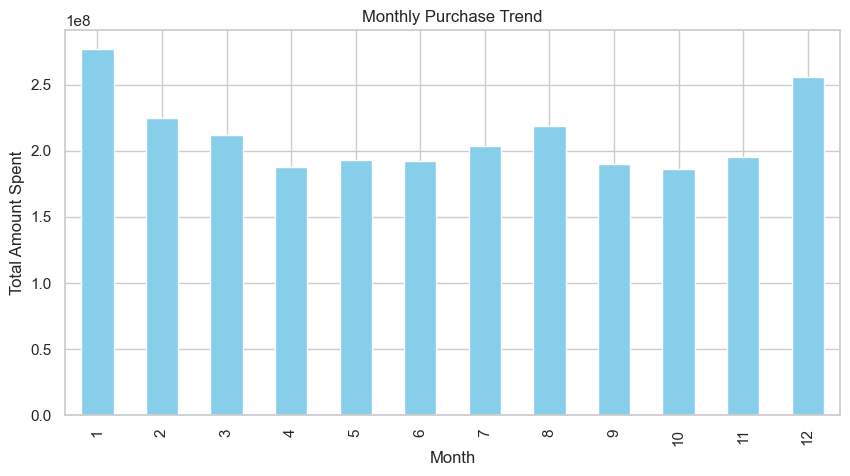

In [28]:
plt.figure(figsize=(10,5))
monthly_trend.plot(kind='bar',color='skyblue')
plt.title('Monthly Purchase Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount Spent')
plt.show()

#          OVERVIEW 
             1. Basic statistics and missing value detection.  
             2. EDA to understand category, brand distribution, and purchase patterns. 
             3. Correlation analysis to identify relationships between variables. 
             4. Statistical tests using SciPy to compare ratings between genders. 
             5. Visualization using Matplotlib and Seaborn.